In [12]:
import pickle
import math
import pandas as pd 
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt




In [13]:
# open a file, where you stored the pickled data
file = open('../auxillary data/test_answers_5.pk', 'rb')

# dump information to that file
test_answers_list = pickle.load(file)

# close the file
file.close()

def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n

In [14]:
dataset = pd.read_csv('../data/updated_test.csv') 
unique_labels =dataset.updated_label.unique().tolist() 
print("Unique Labels in the Dataset:\n\n ", unique_labels)

Unique Labels in the Dataset:

  ['fallacy of extension', 'faulty generalization', 'fallacy of logic', 'false causality', 'fallacy of credibility', 'circular reasoning', 'ad hominem', 'ad populum', 'intentional', 'fallacy of relevance', 'equivocation', 'false dilemma']


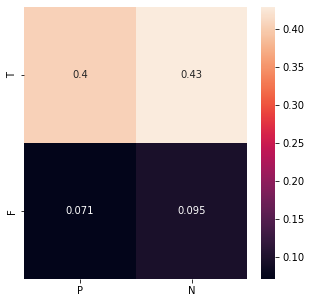

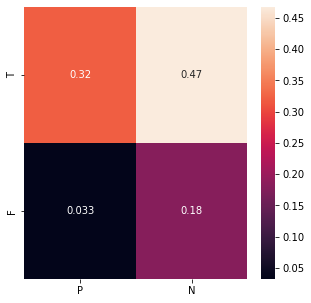

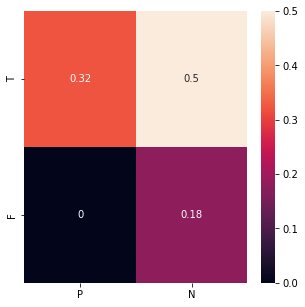

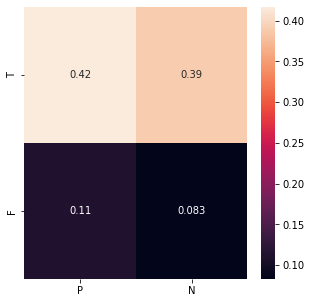

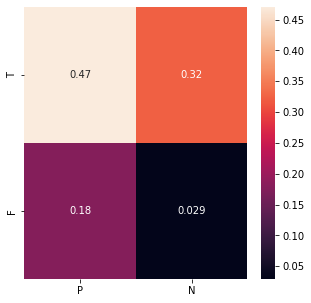

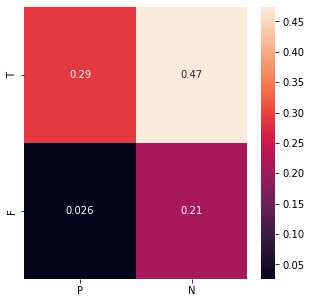

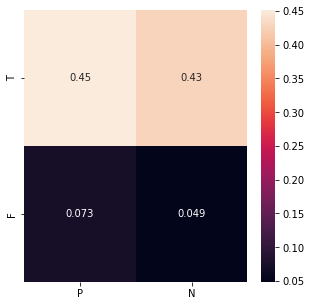

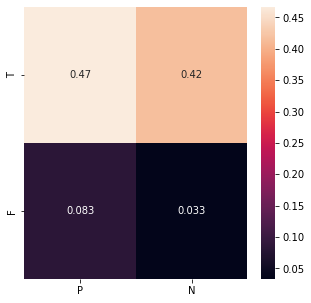

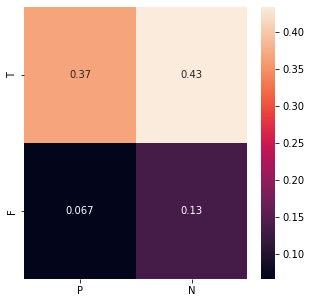

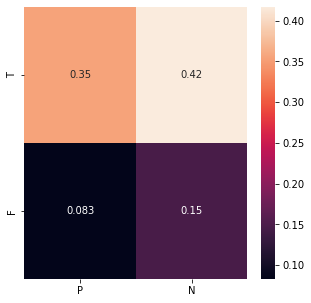

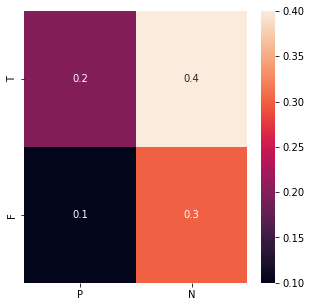

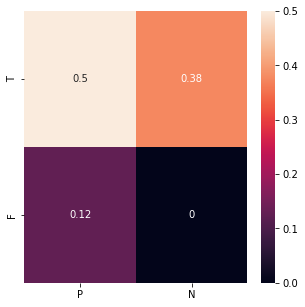

In [15]:


tp_list, tn_list, fp_list, fn_list = [], [], [], [] 
accuracy_list, precision_list, recall_list = [], [], [] 
for i in range(len(unique_labels)):
    test_df = pd.read_csv('../data/'+unique_labels[i]+'_test.csv')
    len_num = len(test_df)

    tp=len(test_answers_list[i][1][1])/len_num
    fn=len(test_answers_list[i][1][0])/len_num
    fp=len(test_answers_list[i][0][1])/len_num
    tn=len(test_answers_list[i][0][0])/len_num


    array_matrix = [[tp,tn], 
                    [fp,fn]]
    df_cm = pd.DataFrame(array_matrix, index = ['T', 'F'],
                    columns = ['P', 'N'])
    plt.figure(figsize = (5,5))
    sn.heatmap(df_cm, annot=True)

    precision = truncate( tp / (tp + fp), 3) 
    recall = truncate( tp/ (tp + fn), 3)
    accuracy =truncate( tp+tn/(tp+tn+fp+fn), 3) 

    tp_list.append(truncate(tp,3)) 
    tn_list.append(truncate(tn, 3)) 
    fp_list.append(truncate(fp,3)) 
    fn_list.append(truncate(fn, 3))
    accuracy_list.append(accuracy) 
    recall_list.append(recall) 
    precision_list.append(precision) 
    

In [16]:
extract_classes = [] 

token_labels_dictionary = { 
        'lbl01':'false causality', 
        'lbl02':'ad populum', 
        'lbl03':'circular reasoning',
        'lbl04':'fallacy of relevance', 
        'lbl05': 'faulty generalization', 
        'lbl06':'ad hominem', 
        'lbl07':'fallacy of extension', 
        'lbl08':'equivocation', 
        'lbl09':'fallacy of logic', 
        'lbl10':'fallacy of credibility',
        'lbl11': 'intentional', 
        'lbl12':'false dilemma', 
        'lbl13':'miscellaneous', 
        'lbl14': 'appeal to emotion'}


 


In [17]:

for test_answers in test_answers_list:
    classes = [] 
    for false_positive in test_answers[0][1]:
        if false_positive[0][-5:] in token_labels_dictionary:
            token = token_labels_dictionary[false_positive[0][-5:]]
        else:
            print(false_positive[0][-5:] )
        classes.append(token)
    classes = list(set(classes))
    extract_classes.append(classes)

In [18]:
dictionary = {
    'fallacy class': unique_labels, 
    'accuracy': accuracy_list,
    'precision': precision_list, 
    'recall': recall_list, 
    'TP': tp_list, 
    'TN': tn_list,
    'FP':fp_list, 
    'FN':fn_list, 
    'Classes for False Positive:': extract_classes
}
df = pd.DataFrame.from_dict(dictionary) 
df.to_csv (r'../results/results_classifier_deBERTa_5.csv', index = False, header=True) 

